# Solving the n-Queens Problem using Local Search

Student Name: MohammadAli Ezzati

I have used the following AI tools: Python, Matplotlip, Numpy,Scipy, Pandas]

I understand that my submission needs to be my own work: MohammadAli Ezzati

## Instructions



Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.



## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import math
import operator as op
from functools import reduce

np.random.seed(1234)


def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom 

def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


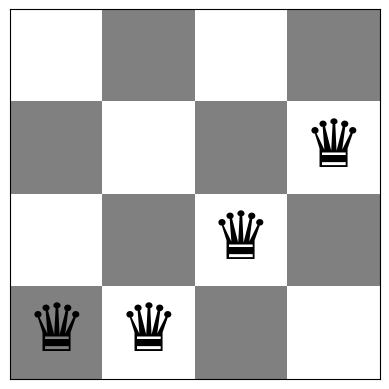

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [5]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


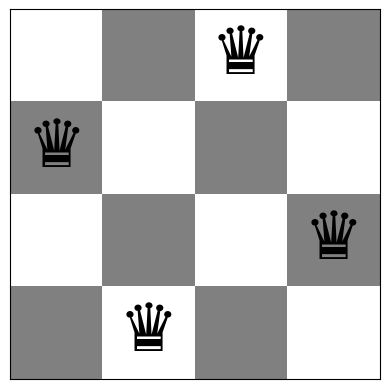

In [6]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

In [47]:


 
def generate_successors(original_array, value_range):
    """
    Generate all possible successors for an array where each element can vary within a given range.
    :param original_array: The original array.
    :param value_range: The maximum value an element can take, starting from 0.
    :return: A dictionary mapping each successor to its number of conflicts.
    """
    successors = {}  # Initialize an empty dictionary to hold successors and their conflict counts.
    for i in range(len(original_array)):
        for j in range(value_range):
            if original_array[i] != j:  # Ensure the new value is different from the current value.
                new_arr = list(original_array)  # Create a new list based on the original array.
                new_arr[i] = j  # Modify the ith element to the new value.
                # Use the conflicts function to compute the number of conflicts for the new arrangement.
                successors[tuple(new_arr)] = conflicts(new_arr)
    return successors



def steep_ascend_hill_climbing(original_array, value_range, verbose = False):
    #create array to save list of the best moves
    bestMoves ={}
    #create list of successors
    successorList=generate_successors(original_array, value_range)
    #with this code we going to get numer of conflicts which is the heuristic part 
    current_heuristic = conflicts(original_array)
    #Scan all successors to find best heuristic value 
    for key, value in successorList.items():
        if value < current_heuristic:
            current_heuristic = value

    

    
    #Scan all successors to find best queen combinations
    for key,value in successorList.items():
# if that combination's heuristc function is equal to best case, then we can add it to the list of the best solution

        if value == current_heuristic:
            
            bestMoves[key] = value
    
    
    return bestMoves

board = [3,3,2,0]

test = steep_ascend_hill_climbing(board,len(board))




{(1, 3, 2, 0): 1}


## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [75]:
import random 

def stochastic_hill_climbing(original_array, value_range):
    current_array = original_array
    current_heuristic = conflicts(current_array)
    
    result = {}
    print(f"Starting with heuristic: {current_heuristic}")
    
    while True:
        # Generate successors and their heuristics
        successors = generate_successors(current_array, value_range)
        successor_heuristics = {key: conflicts(key) for key in successors}
        
        # Filter successors that have a better heuristic than the current state
        better_successors = {k: v for k, v in successor_heuristics.items() if v < current_heuristic}
        
        if not better_successors:
            # If no better successors, we're at a peak
            break
        
        # Randomly select one of the better successors
        current_array = random.choice(list(better_successors.keys()))
        current_heuristic = better_successors[current_array]
        print(f"Moved to new state with heuristic: {current_heuristic}")
    
    print(f"Ended with state: {current_array} and heuristic: {current_heuristic}")
    result[tuple(current_array)]=current_heuristic
    return result

final_state = stochastic_hill_climbing(board, len(board))
print(f"Final state: {final_state}")

Starting with heuristic: 5
Moved to new state with heuristic: 3
Moved to new state with heuristic: 2
Moved to new state with heuristic: 0
Ended with state: (1, 3, 0, 2) and heuristic: 0
Final state: {(1, 3, 0, 2): 0}


## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [38]:
import random
 
def stocastic_hill_climging_2(original_array, value_range, steps):
    current_array = original_array.copy()
    current_heuristic = conflicts(current_array)
    no_progress_counter = 0

    print(f"Starting heuristic: {current_heuristic}")

    while no_progress_counter < steps:
        i = random.randint(0, len(current_array) - 1)
        new_value = random.randint(0, value_range - 1)

        while new_value == current_array[i]:
            new_value = random.randint(0, value_range - 1)

        new_array = current_array.copy()
        new_array[i] = new_value
        new_heuristic = conflicts(new_array)

        if new_heuristic < current_heuristic:
            print(f"Moving from {current_array} (heuristic: {current_heuristic}) to {new_array} (heuristic: {new_heuristic})")
            # show_board(new_array)  # Assuming this is a function to visualize the board/array
            current_array = new_array
            current_heuristic = new_heuristic
            no_progress_counter = 0  # Reset counter since we found a better state
        else:
            no_progress_counter += 1  # Increment if no improvement

    return current_array, current_heuristic


board = [0,1,0,3]
final_state = stocastic_hill_climging_2(board,len(board),steps = 100)
print(f"Final state: {final_state}")

        

Starting heuristic: 5
Moving from [0, 1, 0, 3] (heuristic: 5) to [0, 0, 0, 3] (heuristic: 4)
Moving from [0, 0, 0, 3] (heuristic: 4) to [0, 2, 0, 3] (heuristic: 2)
Moving from [0, 2, 0, 3] (heuristic: 2) to [1, 2, 0, 3] (heuristic: 1)
Final state: ([1, 2, 0, 3], 1)


## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

Best move(s) found with heuristic 1: [(1, 3, 2, 0)]
New best solution with heuristic 1: (1, 3, 2, 0)
Restarting... 99 restarts left
Best move(s) found with heuristic 4: [(0, 2, 2, 2), (1, 2, 2, 2), (3, 2, 2, 2), (2, 0, 2, 2), (2, 2, 0, 2), (2, 2, 2, 0), (2, 2, 2, 1), (2, 2, 2, 3)]
New best solution with heuristic 4: (2, 0, 2, 2)
Restarting... 98 restarts left
Restarting... 97 restarts left
Best move(s) found with heuristic 2: [(0, 3, 1, 3), (0, 3, 3, 0), (0, 3, 3, 1), (0, 3, 3, 2)]
New best solution with heuristic 2: (0, 3, 3, 1)
Restarting... 96 restarts left
Best move(s) found with heuristic 2: [(0, 3, 1, 1), (1, 3, 1, 0), (1, 3, 1, 2), (1, 3, 1, 3)]
New best solution with heuristic 2: (1, 3, 1, 2)
Restarting... 95 restarts left
Best move(s) found with heuristic 2: [(3, 2, 0, 2)]
New best solution with heuristic 2: (3, 2, 0, 2)
Restarting... 94 restarts left
Restarting... 93 restarts left
Best move(s) found with heuristic 1: [(1, 3, 0, 0), (1, 2, 0, 3)]
New best solution with heurist

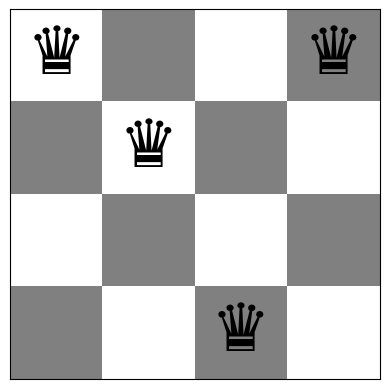

Final solution: [0, 1, 3, 0] with heuristic: 2


In [53]:

import random

def steep_ascend_hill_climbing_with_restarts(initial_array, value_range, max_restarts, verbose=False):
    restarts_remaining = max_restarts
    best_overall_solution = initial_array
    best_overall_heuristic = conflicts(initial_array)

    while restarts_remaining > 0:
        current_solution, current_heuristic = steep_ascend_hill_climbing(best_overall_solution, value_range, verbose)
        
        # If the new solution is better than the overall best, update the best solution
        if current_heuristic < best_overall_heuristic:
            best_overall_solution = current_solution
            best_overall_heuristic = current_heuristic
            if verbose:
                print(f"New best solution with heuristic {best_overall_heuristic}: {best_overall_solution}")

        # Check if the current state is an improvement; if not, restart
        if current_heuristic >= best_overall_heuristic or not current_solution:
            restarts_remaining -= 1
            best_overall_solution = [random.randint(0, value_range - 1) for _ in range(len(initial_array))]
            best_overall_heuristic = conflicts(best_overall_solution)
            if verbose:
                print(f"Restarting... {restarts_remaining} restarts left")
   
    show_board(best_overall_solution)
    return best_overall_solution, best_overall_heuristic

def steep_ascend_hill_climbing(original_array, value_range, verbose=False):
    # Assuming generate_successors and conflicts are defined elsewhere
    successorList = generate_successors(original_array, value_range)
    current_heuristic = conflicts(original_array)
    bestMoves = {k: v for k, v in successorList.items() if v < current_heuristic}

    if not bestMoves:
        return original_array, current_heuristic  # Return the current state if no better moves
    
    # Find the move(s) with the best (lowest) heuristic value
    best_heuristic = min(bestMoves.values())
    best_solution = [k for k, v in bestMoves.items() if v == best_heuristic]
    
    if verbose and best_solution:
        print(f"Best move(s) found with heuristic {best_heuristic}: {best_solution}")

    # Randomly choose among the best if there are multiple
    chosen_solution = random.choice(best_solution) if best_solution else original_array
    return chosen_solution, best_heuristic

board = [3, 3, 2, 0]
final_solution, final_heuristic = steep_ascend_hill_climbing_with_restarts(board, len(board), max_restarts=100, verbose=True)
print(f"Final solution: {final_solution} with heuristic: {final_heuristic}")

New best solution found: [1, 3, 0, 2] with heuristic 0
Restarting... 99 restarts left.
Restarting... 98 restarts left.
Restarting... 97 restarts left.
Restarting... 96 restarts left.
Restarting... 95 restarts left.
Restarting... 94 restarts left.
Restarting... 93 restarts left.
Restarting... 92 restarts left.
Restarting... 91 restarts left.
Restarting... 90 restarts left.
Restarting... 89 restarts left.
Restarting... 88 restarts left.
Restarting... 87 restarts left.
Restarting... 86 restarts left.
Restarting... 85 restarts left.
Restarting... 84 restarts left.
Restarting... 83 restarts left.
Restarting... 82 restarts left.
Restarting... 81 restarts left.
Restarting... 80 restarts left.
Restarting... 79 restarts left.
Restarting... 78 restarts left.
Restarting... 77 restarts left.
Restarting... 76 restarts left.
Restarting... 75 restarts left.
Restarting... 74 restarts left.
Restarting... 73 restarts left.
Restarting... 72 restarts left.
Restarting... 71 restarts left.
Restarting... 70 

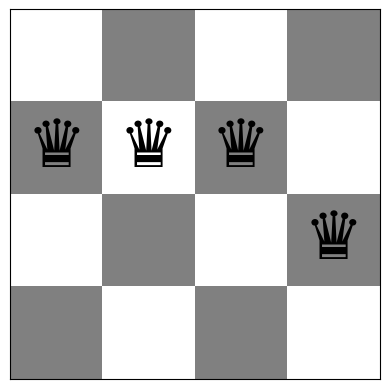

Final solution: [1, 1, 1, 2] with heuristic: 0


In [56]:
import random

def stochastic_hill_climbing_2_with_restarts(original_array, value_range, steps, max_restarts):
    best_solution = original_array.copy()
    best_heuristic = conflicts(best_solution)
    restarts_remaining = max_restarts

    while restarts_remaining > 0:
        current_solution, current_heuristic = stochastic_hill_climbing_2(best_solution, value_range, steps)

        if current_heuristic < best_heuristic:
            best_solution = current_solution
            best_heuristic = current_heuristic
            print(f"New best solution found: {best_solution} with heuristic {best_heuristic}")
            restarts_remaining = max_restarts  # Reset restarts count if improvement found
        else:
            restarts_remaining -= 1
            print(f"Restarting... {restarts_remaining} restarts left.")
            best_solution = [random.randint(0, value_range - 1) for _ in range(len(original_array))]

    return best_solution, best_heuristic

def stochastic_hill_climbing_2(original_array, value_range, steps):
    current_array = original_array.copy()
    current_heuristic = conflicts(current_array)
    no_progress_counter = 0

    while no_progress_counter < steps:
        i = random.randint(0, len(current_array) - 1)
        new_value = random.randint(0, value_range - 1)

        while new_value == current_array[i]:
            new_value = random.randint(0, value_range - 1)

        new_array = current_array.copy()
        new_array[i] = new_value
        new_heuristic = conflicts(new_array)

        if new_heuristic < current_heuristic:
            current_array = new_array
            current_heuristic = new_heuristic
            no_progress_counter = 0  # Reset counter since we found a better state
        else:
            no_progress_counter += 1  # Increment if no improvement

    return current_array, current_heuristic

board = [0, 1, 0, 3]
final_solution, final_heuristic = stochastic_hill_climbing_2_with_restarts(board, len(board), 100, 100)
show_board(final_solution)
print(f"Final solution: {final_solution} with heuristic: {final_heuristic}")

Starting with heuristic: 5
Moved to new state with heuristic: 4
Moved to new state with heuristic: 2
Moved to new state with heuristic: 1
Ended with state: (1, 2, 0, 3) and heuristic: 1
Found a better solution with heuristic 1: (1, 2, 0, 3)
Starting with heuristic: 5
Moved to new state with heuristic: 4
Moved to new state with heuristic: 3
Moved to new state with heuristic: 2
Moved to new state with heuristic: 0
Ended with state: (2, 0, 3, 1) and heuristic: 0
Found a better solution with heuristic 0: (2, 0, 3, 1)
Starting with heuristic: 2
Moved to new state with heuristic: 1
Moved to new state with heuristic: 0
Ended with state: (1, 3, 0, 2) and heuristic: 0
No better solution found. Restarting... 99 restarts left.
Starting with heuristic: 3
Moved to new state with heuristic: 1
Moved to new state with heuristic: 0
Ended with state: (2, 0, 3, 1) and heuristic: 0
No better solution found. Restarting... 98 restarts left.
Starting with heuristic: 5
Moved to new state with heuristic: 4
Mov

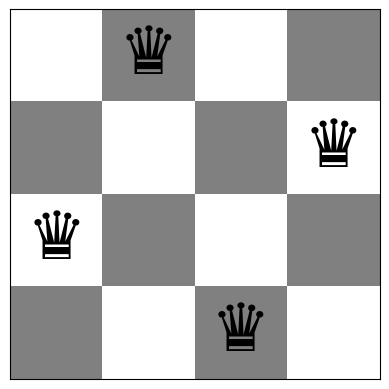

In [66]:
import random

def stochastic_hill_climbing_with_restarts(original_array, value_range, max_restarts):
    best_solution = None
    best_heuristic = float('inf')
    restarts_remaining = max_restarts

    while restarts_remaining > 0:
        # Attempt stochastic hill climbing from the current or new random state
        current_result = stochastic_hill_climbing(original_array, value_range)
        current_state, current_heuristic = list(current_result.items())[0]

        if current_heuristic < best_heuristic:
            best_solution = current_state
            best_heuristic = current_heuristic
            print(f"Found a better solution with heuristic {best_heuristic}: {best_solution}")
            # Reset restarts if a better solution is found
            restarts_remaining = max_restarts
        else:
            restarts_remaining -= 1
            print(f"No better solution found. Restarting... {restarts_remaining} restarts left.")
        
        # Generate a new random state for the next iteration if needed
        if restarts_remaining > 0:
            original_array = [random.randint(0, value_range - 1) for _ in range(len(original_array))]

    return {tuple(best_solution): best_heuristic}

def stochastic_hill_climbing(original_array, value_range):
    current_array = original_array
    current_heuristic = conflicts(current_array)
    print(f"Starting with heuristic: {current_heuristic}")
    
    while True:
        successors = generate_successors(current_array, value_range)
        successor_heuristics = {key: conflicts(key) for key in successors}
        
        better_successors = {k: v for k, v in successor_heuristics.items() if v < current_heuristic}
        
        if not better_successors:
            break
        
        current_array = random.choice(list(better_successors.keys()))
        current_heuristic = better_successors[current_array]
        print(f"Moved to new state with heuristic: {current_heuristic}")
    
    print(f"Ended with state: {current_array} and heuristic: {current_heuristic}")
    return {tuple(current_array): current_heuristic}

# Assuming generate_successors and conflicts are defined elsewhere

# Example usage
board = [0, 1, 0, 3]
final_solution_dict = stochastic_hill_climbing_with_restarts(board, len(board), 100)
# The keys of this dictionary are the final state arrays, and the values are the heuristic scores.

# Extract the board state and its heuristic value
final_board_state, final_heuristic = list(final_solution_dict.items())[0]

print(f"Final board state: {final_board_state}")
print(f"Final heuristic value: {final_heuristic}")

# If you want to use show_board, make sure final_board_state is in the correct format (list, not tuple)
show_board(list(final_board_state))


## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms.
2. Discuss your choice of annealing schedule.

Initial Board:
Board with 5 conflicts.


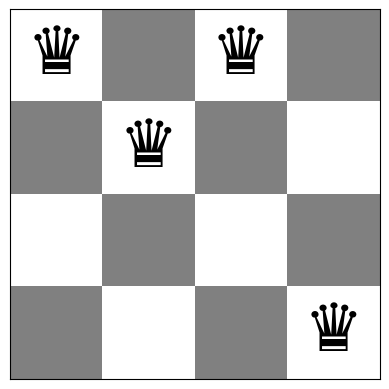



Initial Temperature: 28.473664743089714


Final Temperature: 0.09997383587952466
Total of Number of steps: 5650
Board with 0 conflicts.


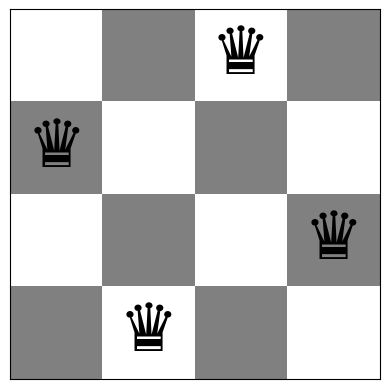

In [35]:
def Simulated_Annealing(board, verbose = False,T0 = None, alpha = 0.999, epsilon = 1e-1):
    
    print("Initial Board:")
    if verbose: show_board(board)      
    n = len(board)  
    best_val = conflicts(board) # Current Coflicts
    vals = np.full([n,n], -1, dtype = int)    
    Prob_History=[]
    Number_of_steps = 0 
    deltaE = (n^2)/2
    alpha = 0.999
    probability_T0 = 0.9
    T0 = -(n^2)/(2*np.log(0.9))
    print("\n")
    print("Initial Temperature:", T0)
    T = T0
    
    while T > epsilon:
        
        T = T0 * alpha ** Number_of_steps
        for j in range(n):
            old_q = board[j]
            for i in range(n):
                board[j] = i
                vals[i,j] = conflicts(board)
            board[j] = old_q
        
        random_number_one = np.random.randint(0,n)
        random_number_two = np.random.randint(0,n)
        new_min = vals[random_number_one][random_number_two]
          
        deltaE = (new_min) - (best_val)
        if deltaE <= 0:
                w = np.where(vals == new_min)
                best = [a for a in zip(w[0], w[1])]
                best = best[np.random.randint(0, len(best))]
                board[best[1]] = best[0]
                best_val = new_min 

        else:
            probability = np.random.choice(a=[1, 0], p=[ np.exp(-deltaE/T), 1-(np.exp(-deltaE/T)) ])
            Prob_History.append(np.exp(-deltaE/T))
            if probability == 1:
                w = np.where(vals == new_min)
                best = [a for a in zip(w[0], w[1])]
                best = best[np.random.randint(0, len(best))]
                board[best[1]] = best[0]
                best_val = new_min        
            else: continue
        Number_of_steps = Number_of_steps + 1 
    print("\n") 
    print("Final Temperature:", T)        
    print("Total of Number of steps:" ,Number_of_steps)
    return(board)
    print("\n")
    
    

b = Simulated_Annealing(board, verbose = True)
show_board(b)

## Task 6: Compare Performance [10 Points]

Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |


Add the used code and the answer to the following questions below.

* How do the algorithms scale with problem size? You will need to run more board sizes. You can add the results to the table above and show the result as a chart.

* What is the largest board each algorithm can solve in a reasonable amount time?

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

In [71]:
#we need to define some helper functions to calclute average run time, conflicts and percent to run optimal solution
import time

def measure_runtime(func, *args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    return end_time - start_time, result

def get_average_runtime(func, iterations, *args, **kwargs):
    total_time = 0
    for _ in range(iterations):
        execution_time, _ = measure_runtime(func, *args, **kwargs)
        total_time += execution_time
    average_time = total_time / iterations
    return average_tim


def get_average_conflict(conflict):
    numberOfConflicts = []
    numberOfConflicts.append(conflict)
    if len(numberOfConflicts) == 0:
        return 0
    return sum(numberOfConflicts) / len(numberOfConflicts)
        
    

Average runtime: 0.0001 seconds
Average number of conflicts: 1.00
Percentage of runs ending in optimal state: 0.00%
Average runtime: 0.0005 seconds
Average number of conflicts: 3.00
Percentage of runs ending in optimal state: 0.00%
4x4 Configuration:
Average runtime: 0.0001 seconds
Average number of conflicts: 0.00
Percentage of runs ending in optimal state: 100.00%

8x8 Configuration:
Average runtime: 0.0005 seconds
Average number of conflicts: 3.00
Percentage of runs ending in optimal state: 0.00%



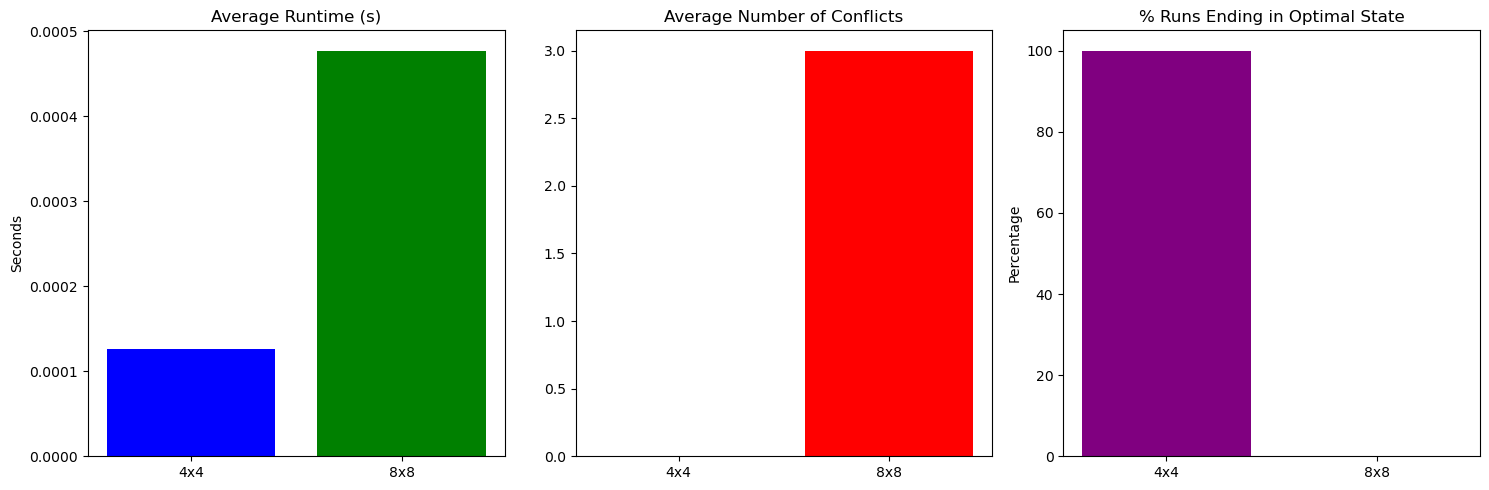

In [81]:
def run_experiment(num_runs, original_array, value_range):
    total_runtime = 0
    total_conflicts = 0
    optimal_runs = 0

    for _ in range(num_runs):
        start_time = time.time()
        # The steep_ascend_hill_climbing function returns a tuple: (best_move, best_conflicts)
        final_state, final_conflicts = steep_ascend_hill_climbing(original_array, value_range)
        runtime = time.time() - start_time
        total_runtime += runtime
        total_conflicts += final_conflicts  # final_conflicts is directly used, not .values()

        if final_conflicts == 0:  # Assuming 0 conflicts is optimal
            optimal_runs += 1

    avg_runtime = total_runtime / num_runs
    avg_conflicts = total_conflicts / num_runs
    percent_optimal = (optimal_runs / num_runs) * 100

    return avg_runtime, avg_conflicts, percent_optimal

num_runs = 10
original_array = [random.randint(0, 3) for _ in range(4)]  # Generate a random initial state
value_range = 4  # The range of values in the array

avg_runtime, avg_conflicts, percent_optimal = run_experiment(
    num_runs, original_array, value_range
)
print(f"Average runtime: {avg_runtime:.4f} seconds")
print(f"Average number of conflicts: {avg_conflicts:.2f}")
print(f"Percentage of runs ending in optimal state: {percent_optimal:.2f}%")

original_array = [random.randint(0, 7) for _ in range(8)]  # Generate a random initial state for an 8x8 board
value_range = 8

avg_runtime, avg_conflicts, percent_optimal = run_experiment(
    num_runs, original_array, value_range
)

print(f"Average runtime: {avg_runtime:.4f} seconds")
print(f"Average number of conflicts: {avg_conflicts:.2f}")
print(f"Percentage of runs ending in optimal state: {percent_optimal:.2f}%")



configs = ['4x4', '8x8']
avg_runtimes = []
avg_conflicts = []
percent_optimals = []

for config in configs:
    num_runs = 10
    original_array = [random.randint(0, 3) for _ in range(4)] if config == '4x4' else [random.randint(0, 7) for _ in range(8)]
    value_range = 4 if config == '4x4' else 8
    
    avg_runtime, avg_conflict, percent_optimal = run_experiment(num_runs, original_array, value_range)
    
    print(f"{config} Configuration:")
    print(f"Average runtime: {avg_runtime:.4f} seconds")
    print(f"Average number of conflicts: {avg_conflict:.2f}")
    print(f"Percentage of runs ending in optimal state: {percent_optimal:.2f}%\n")
    
    avg_runtimes.append(avg_runtime)
    avg_conflicts.append(avg_conflict)
    percent_optimals.append(percent_optimal)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Average Runtime
axs[0].bar(configs, avg_runtimes, color=['blue', 'green'])
axs[0].set_title('Average Runtime (s)')
axs[0].set_ylabel('Seconds')

# Average Conflicts
axs[1].bar(configs, avg_conflicts, color=['orange', 'red'])
axs[1].set_title('Average Number of Conflicts')

# Percentage Optimal
axs[2].bar(configs, percent_optimals, color=['purple', 'brown'])
axs[2].set_title('% Runs Ending in Optimal State')
axs[2].set_ylabel('Percentage')

plt.tight_layout()
plt.show()






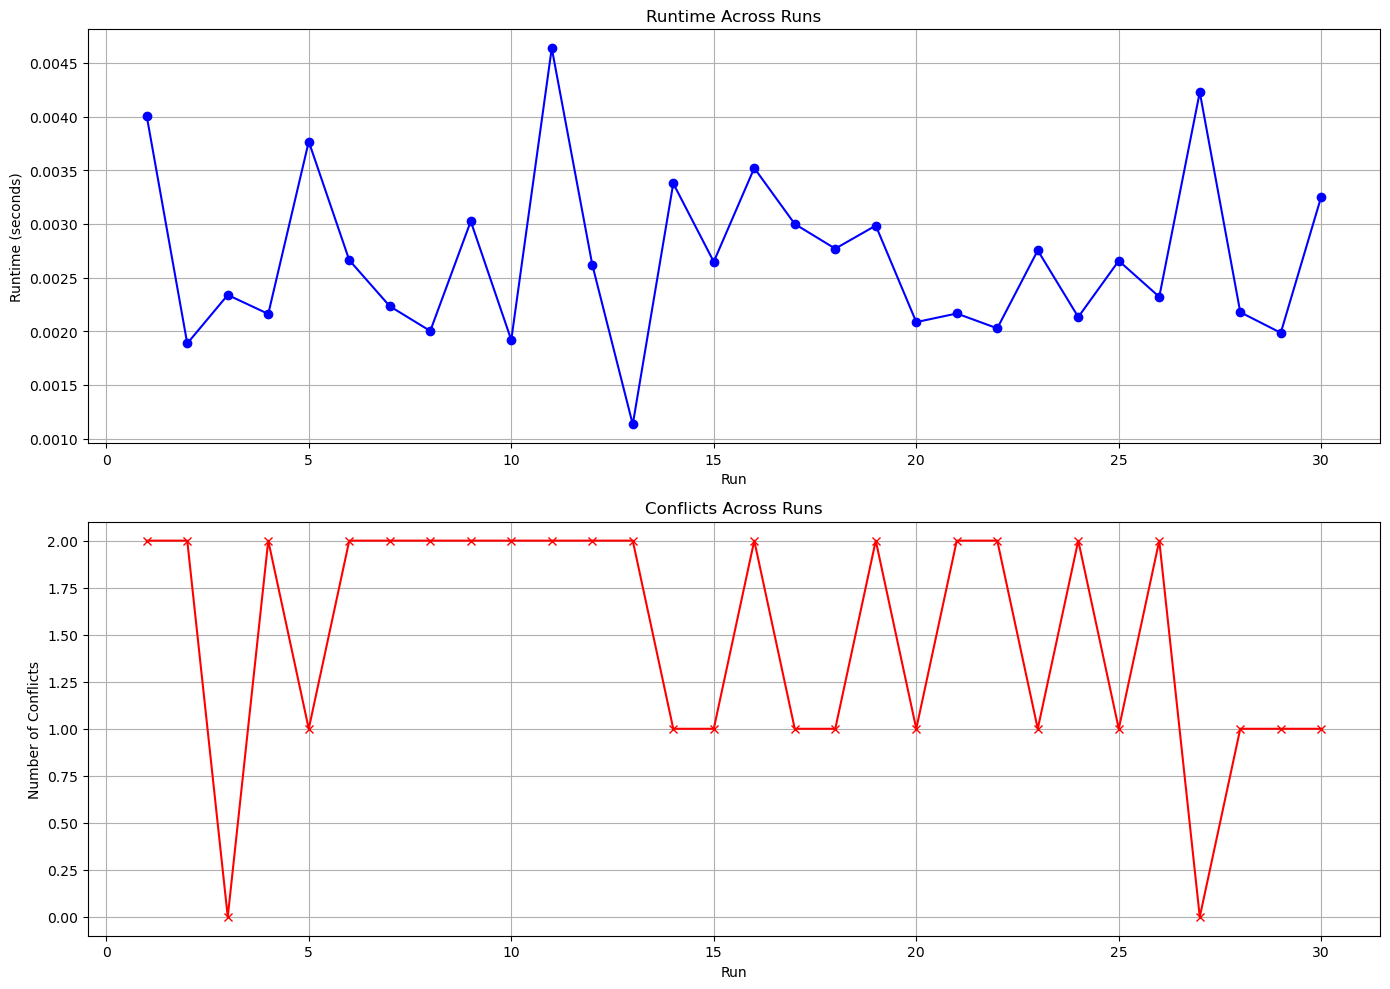

In [90]:
import random
import time
import matplotlib.pyplot as plt

# Assuming conflicts function is defined elsewhere

def run_experiment_with_stochastic_hill_climbing(num_runs, original_array, value_range, steps, optimal_conflicts=0):
    runtimes = []
    conflicts_list = []

    for _ in range(num_runs):
        start = time.time()
        final_state, final_heuristic = stochastic_hill_climbing_2(original_array, value_range, steps)
        end = time.time()

        runtime = end - start
        runtimes.append(runtime)
        conflicts_list.append(final_heuristic)

    avg_runtime = sum(runtimes) / num_runs
    avg_conflicts = sum(conflicts_list) / num_runs
    percent_optimal = (len([c for c in conflicts_list if c <= optimal_conflicts]) / num_runs) * 100

    # Now return all five values
    return avg_runtime, avg_conflicts, percent_optimal, runtimes, conflicts_list


# Define your stochastic_hill_climbing_2 function and conflicts function as per your problem

# Run the experiment
_, _, _, runtimes, conflicts_list = run_experiment_with_stochastic_hill_climbing(
    num_runs, original_array, value_range, steps
)

# Generate a sequence of run numbers for the x-axis
runs = list(range(1, num_runs + 1))

# Creating subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# Plotting runtime across runs
axs[0].plot(runs, runtimes, marker='o', linestyle='-', color='b')
axs[0].set_title('Runtime Across Runs')
axs[0].set_xlabel('Run')
axs[0].set_ylabel('Runtime (seconds)')
axs[0].grid(True)

# Plotting conflicts across runs
axs[1].plot(runs, conflicts_list, marker='x', linestyle='-', color='r')
axs[1].set_title('Conflicts Across Runs')
axs[1].set_xlabel('Run')
axs[1].set_ylabel('Number of Conflicts')
axs[1].grid(True)

plt.tight_layout()
plt.show()


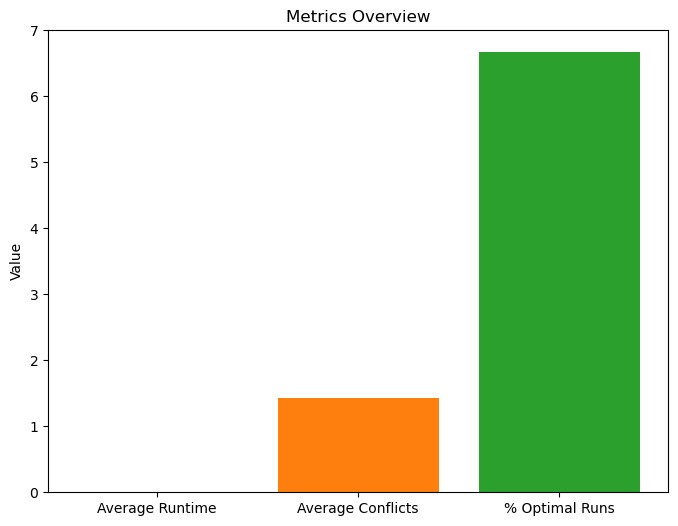

In [89]:
import matplotlib.pyplot as plt
import numpy as np  # For numerical operations and value positioning

# Assuming data variables 'avg_runtime', 'avg_conflicts', and 'percent_optimal' are set from the previous code

# Simplified plotting to diagnose the issue
fig, ax = plt.subplots(figsize=(8, 6))

# Ensure all values are numerical and can be plotted directly
values = [float(avg_runtime), float(avg_conflicts), float(percent_optimal)]

# Create bars using simplified values to avoid the ValueError
bars = ax.bar(['Average Runtime', 'Average Conflicts', '% Optimal Runs'], values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

plt.ylabel('Value')
plt.title('Metrics Overview')
plt.show()


Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924

Initial Temperature: 75.92977264823924


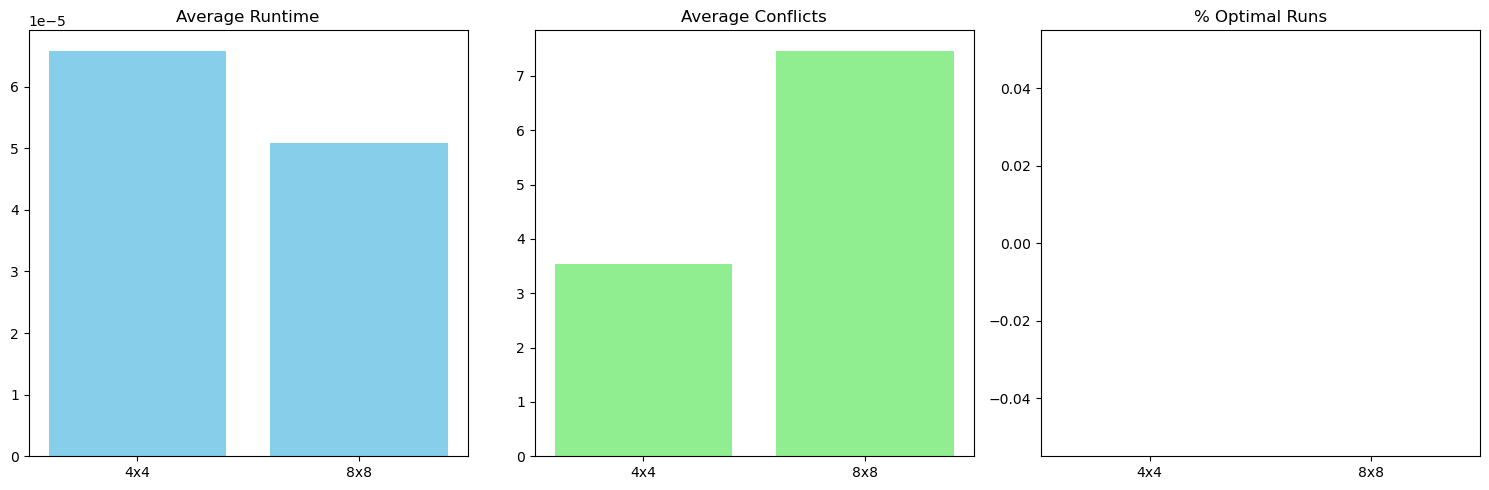

In [93]:

def Simulated_Annealing(board, T0=None, alpha=0.999, epsilon=1e-1, verbose=False):
    start_time = time.time()
    
    if verbose:
        print("Initial Board:")
        # Assuming show_board is correctly defined and prints the board
        show_board(board)

    n = len(board)
    best_val = conflicts(board)  # Assuming conflicts is defined and returns the number of conflicts
    vals = np.full([n,n], -1, dtype=int)
    Prob_History = []
    Number_of_steps = 0
    deltaE_avg = n**2 / 2  # Assuming an average deltaE calculation; adjust as needed
    if T0 is None:
        T0 = -deltaE_avg / np.log(0.9)  # Initial temperature calculation
    T = T0
    
    print("\nInitial Temperature:", T0)

    while T > epsilon:
        T = T * alpha ** Number_of_steps  # Exponential decay of temperature
        # Your simulated annealing logic here...
        Number_of_steps += 1  # Make sure to increment this within your main loop

    runtime = time.time() - start_time
    final_conflicts = conflicts(board)  # Final number of conflicts
    
    if verbose:
        print("\nFinal Temperature:", T)
        print("Total Number of Steps:", Number_of_steps)

    # Ensure return statement is outside the loop and includes Number_of_steps
    return board, final_conflicts, runtime, Number_of_steps


def run_SA_experiment(num_runs, n, T0=None, alpha=0.999, epsilon=1e-1, optimal_conflicts=0):
    total_runtime = 0
    total_conflicts = 0
    optimal_runs = 0

    for _ in range(num_runs):
        board = [random.randint(0, n-1) for _ in range(n)]
        _, conflicts, runtime, _ = Simulated_Annealing(board, T0, alpha, epsilon)
        total_runtime += runtime
        total_conflicts += conflicts
        if conflicts <= optimal_conflicts:
            optimal_runs += 1

    avg_runtime = total_runtime / num_runs
    avg_conflicts = total_conflicts / num_runs
    percent_optimal = (optimal_runs / num_runs) * 100

    return avg_runtime, avg_conflicts, percent_optimal

num_runs = 30
results = {}

for n in [4, 8]:
    results[n] = run_SA_experiment(num_runs, n)


    
    
    
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['Average Runtime', 'Average Conflicts', '% Optimal Runs']
colors = ['skyblue', 'lightgreen', 'lightcoral']

for i, metric in enumerate(metrics):
    axs[i].bar(['4x4', '8x8'], [results[4][i], results[8][i]], color=colors[i])
    axs[i].set_title(metric)

plt.tight_layout()
plt.show()


## Advanced task: Exploring other Local Moves

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

Implement a few different local moves. Implement:

* moving one queen only one square at a time
* switching two columns
* move two queens at a time

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

Implementing and comparing different local moves for the 8-Queens problem requires a tailored approach to incorporate each type of move into the stochastic hill climbing algorithm. Below, I will provide simplified implementations for each requested move type within the context of your stochastic_hill_climbing_2 function. For the comparison, we'll discuss a strategy to evaluate their effectiveness based on the average number of steps to solve the problem and the success rate.



In [95]:
def move_one_queen_one_square(board):
    n = len(board)
    i = random.randint(0, n - 1)  # Select a queen at random
    # Possible one-step moves: one step up or down, if within bounds
    possible_moves = [board[i] - 1 if board[i] > 0 else None, 
                      board[i] + 1 if board[i] < n - 1 else None]
    possible_moves = [move for move in possible_moves if move is not None]
    return i, random.choice(possible_moves)  # Column and new row


## Switching Two Columns
This move isn't applicable in the standard representation of the 8-Queens problem where each column has one queen and is represented by the row position. A more relevant move might be swapping the positions of two queens, but it's equivalent to selecting new positions for them independently in this context.

## Move Two Queens at a Time
Similar to moving one queen, but you select two different queens.




In [94]:
def move_two_queens(board):
    n = len(board)
    i1, i2 = random.sample(range(n), 2)  # Select two distinct queens
    # New positions for these queens
    new_pos1 = random.randint(0, n - 1)
    new_pos2 = random.randint(0, n - 1)
    return (i1, new_pos1), (i2, new_pos2)


def apply_move(board, move_type):
    if move_type == "one_queen_one_square":
        col, new_row = move_one_queen_one_square(board)
        board[col] = new_row
    elif move_type == "two_queens":
        (col1, new_row1), (col2, new_row2) = move_two_queens(board)
        board[col1] = new_row1
        board[col2] = new_row2
    return board

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

## genetic algorithm summery

Genetic algorithms (GAs) offer a robust approach to solving the N-Queens puzzle, a problem of placing N queens on an N×N chessboard so that no two queens threaten each other, meaning they can't be in the same row, column, or diagonal. The essence of applying GAs to this problem involves simulating the process of natural selection to evolve solutions over generations.

The first step in this approach is to represent potential solutions as chromosomes. In the context of the N-Queens puzzle, a chromosome can be a one-dimensional array of N numbers, where each number represents the row position of a queen in its corresponding column. This ensures that queens are not placed in the same column.

An initial population of such chromosomes is generated randomly. This population undergoes evolution through a series of genetic operations: selection, crossover, and mutation. The fitness function is crucial here, measuring how close a chromosome is to an ideal solution. It typically counts the non-threatening pairs of queens, aiming to maximize this number.

Selection picks the fittest chromosomes to breed a new generation, favoring solutions that are closer to the goal. Crossover, the next step, mixes genetic information from two parents to produce offspring, introducing new solutions. Mutation adds further diversity, randomly altering genes (queen positions) to explore new solutions and avoid local optima.

Through these steps, the algorithm iteratively improves the population's fitness. Over generations, it converges towards a solution where no queens threaten each other, effectively solving the puzzle. This method stands out for its flexibility and scalability, capable of tackling larger instances of the N-Queens problem by simulating evolutionary principles.

Four Starting Boards (Initial Population):


Board 1:
Board with 7 conflicts.


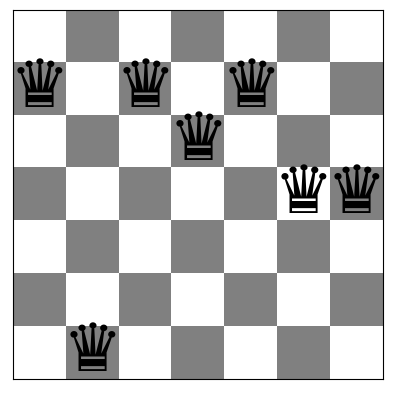



Board 2
Board with 10 conflicts.


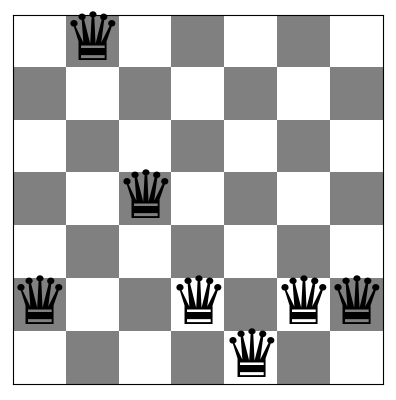



Board 3
Board with 6 conflicts.


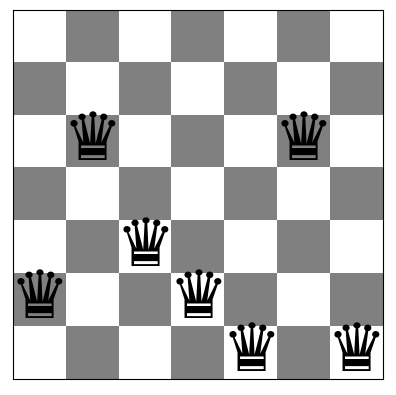



Board 4
Board with 7 conflicts.


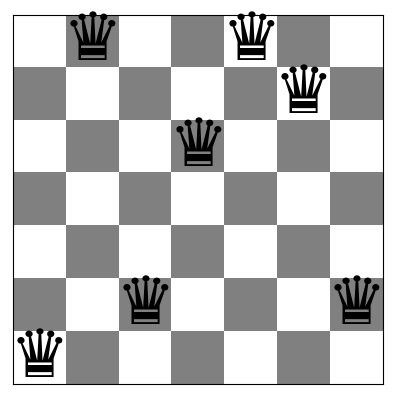



Final Boards:
Total Number of steps: 9291
Board 1
Board with 12 conflicts.


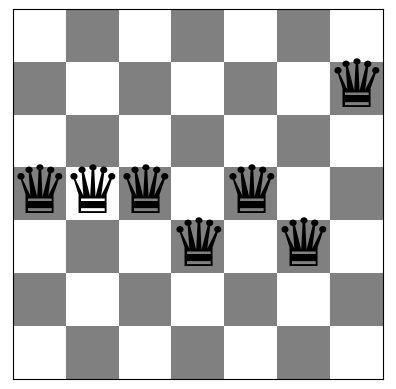

Board 2
Board with 9 conflicts.


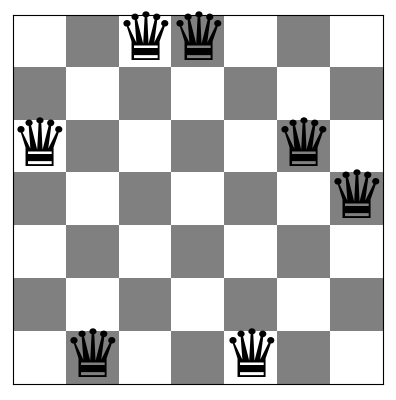

Board 3
Board with 5 conflicts.


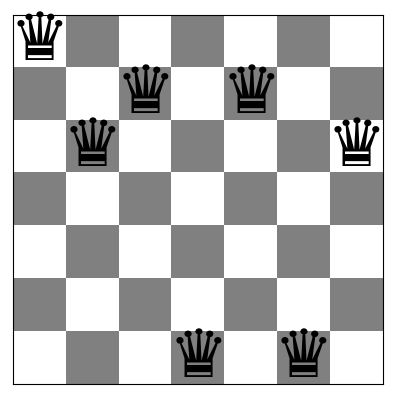

Board 4
Board with 0 conflicts.


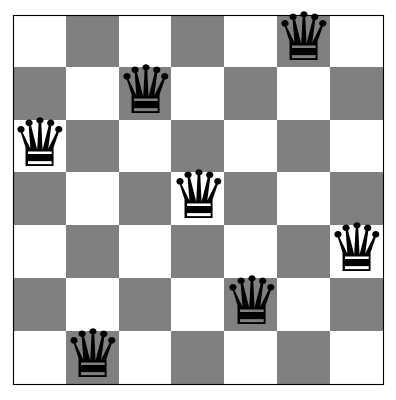

In [37]:
Queen_locations1 = random_board(7)
Queen_locations2 = random_board(7)
Queen_locations3 = random_board(7)
Queen_locations4 = random_board(7)


def Genetic_Algorithm(Queen_locations1, Queen_locations2, Queen_locations3, Queen_locations4, verbose = False):
    
    New_Conflicts1 = 0
    New_Conflicts2 = 0
    New_Conflicts3 = 0
    New_Conflicts4 = 0
    n = len(Queen_locations1)
    
    print("Four Starting Boards (Initial Population):")
    print("\n")
    print("Board 1:")
    show_board(Queen_locations1)
    print("\n")
    print("Board 2")
    show_board(Queen_locations2)
    print("\n")
    print("Board 3")
    show_board(Queen_locations3)  
    print("\n")
    print("Board 4")
    show_board(Queen_locations4)    

    New_Conflicts = 10
    New_Conflicts_history = []
    j = 0
    while New_Conflicts > 0:
        j = j + 1
        
        # Step two - Conflicts (Fitness Function)
        Current_Conflicts1 = conflicts(Queen_locations1) # 3
        Current_Conflicts2 = conflicts(Queen_locations2) # 2
        Current_Conflicts3 = conflicts(Queen_locations3) # 3
        Current_Conflicts4 = conflicts(Queen_locations4) # 2        
    
        #Step Three - Split
        a = np.random.randint(0,n)
        Selection1 = []
        Selection2 = []
        Selection3 = []
        Selection4 = []        
        for i in range(a):
            Selection1.append(Queen_locations1[i])
            Selection2.append(Queen_locations2[i])
            Selection3.append(Queen_locations3[i])
            Selection4.append(Queen_locations4[i])            
        Unselect1 = []
        Unselect2 = []
        Unselect3 = []
        Unselect4 = []        
        for i in range(a, n):
            Unselect1.append(Queen_locations1[i])
            Unselect2.append(Queen_locations2[i])
            Unselect3.append(Queen_locations3[i])
            Unselect4.append(Queen_locations4[i])
        # Cross over   
        Crossover1 = Selection1 + Unselect2
        Crossover2 = Selection2 + Unselect1
        Crossover3 = Selection3 + Unselect4
        Crossover4 = Selection4 + Unselect3       
    
        # Mutation
        index1 = np.random.randint(0,n)
        index2 = np.random.randint(0,n)
        index3 = np.random.randint(0,n)
        index4 = np.random.randint(0,n)        
        Crossover1[index1] = np.random.randint(0,n)
        Crossover2[index2] = np.random.randint(0,n)
        Crossover3[index3] = np.random.randint(0,n)
        Crossover4[index4] = np.random.randint(0,n) 

        New_Conflicts1 = conflicts(Crossover1)
        New_Conflicts2 = conflicts(Crossover2)
        New_Conflicts3 = conflicts(Crossover3)
        New_Conflicts4 = conflicts(Crossover4)        
        New_Conflicts = (min(New_Conflicts1, New_Conflicts2, New_Conflicts3, New_Conflicts4 ))
        New_Conflicts_history.append(New_Conflicts)
 
        Queen_locations1 = Crossover1
        Queen_locations2 = Crossover2
        Queen_locations3 = Crossover3
        Queen_locations4 = Crossover4

    if New_Conflicts==0:
        print("\n")
        print("Final Boards:")
        print("Total Number of steps:", j)
        print("Board 1")
        show_board(Queen_locations1)
        print("Board 2")
        show_board(Queen_locations2)
        print("Board 3")
        show_board(Queen_locations3)
        print("Board 4")
        show_board(Queen_locations4)
    
    return New_Conflicts

b = Genetic_Algorithm(Queen_locations1, Queen_locations2, Queen_locations3, Queen_locations4, verbose = True)